Notebook to test some basic functionalities

In [1]:
import matplotlib.pyplot as plt
from connections import Connections
from connectome_reader import ConnectomeReader
from neuron import Neuron

Perform synaptic based representation.
Allows to test the data loading and preprocessing fro the Neuron class and the Connections class.

In [2]:
"""
# Data loading testing
MDNs = []
neurons_pre = get_neuron_bodyids({'type:string': 'MDN'})

"""

In [ ]:
"""

# Neuron class testing
for i in range(4):
    MDN = Neuron(neurons_pre[i])
    _ = MDN.get_synapse_distribution(threshold=True)
    #MDN.cluster_synapses_spatially(n_clusters=3)
    #MDN.create_synapse_groups(attribute='KMeans_cluster')
    MDN.create_synapse_groups(attribute='neuropil')
    _ = MDN.plot_synapse_distribution(
        color_by='neuropil',
        discrete_coloring=True,
        threshold=True,
        cmap="Spectral")
    MDNs.append(MDN)
"""

In [1]:
from connections import Connections

#VNC = Connections(split_neurons=MDNs)  # full VNC
VNC = Connections()  # full VNC

Attribute class_1 not found in the graph. Adding it.


AttributeError: module 'params' has no attribute 'NEURON_CLASSES'

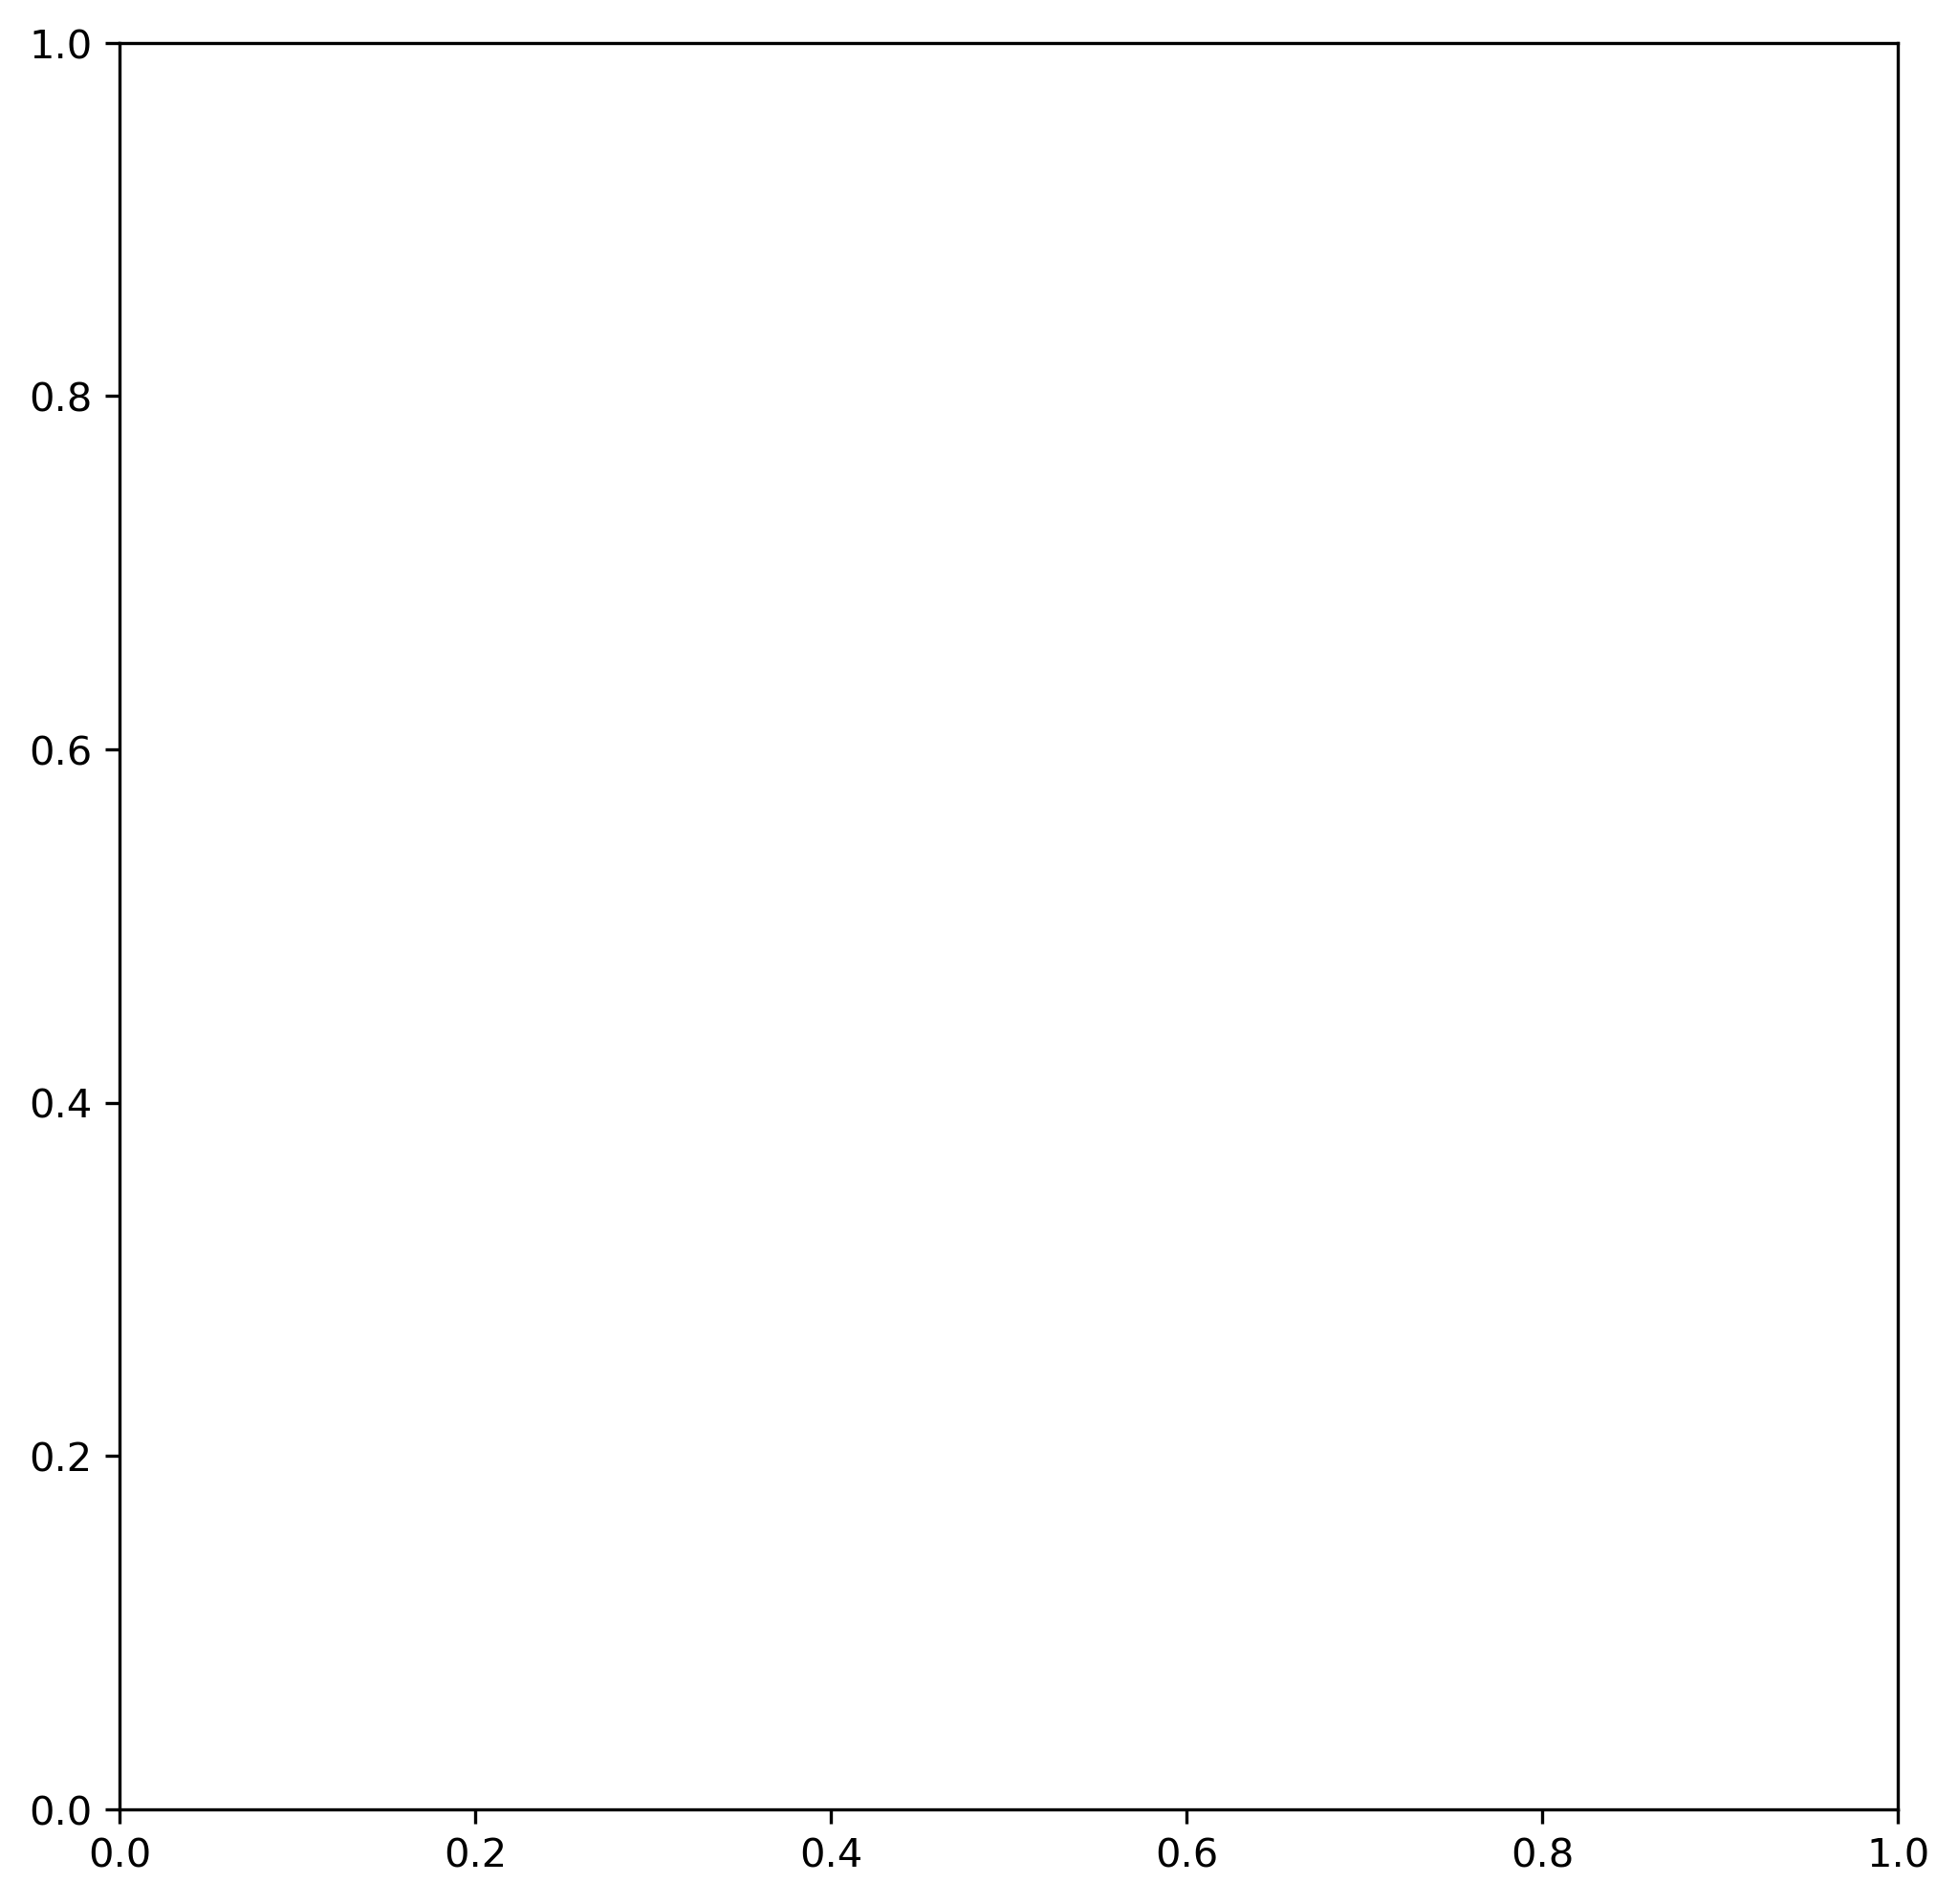

In [2]:
VNC.display_graph(syn_threshold=100)

In [ ]:
mdn_uids = VNC.get_neuron_ids({'type:string': 'MDN'})
mdn_connections = VNC.subgraph(nodes=mdn_uids)
mdn_connections.display_graph(
    label_nodes=True,
    title='MDN-MDN-per-neuropil',
    save = False
    )
plt.show()